<a href="https://colab.research.google.com/github/robgon-art/SpookyGAN/blob/main/1_SpookyGAN_Image_Creation_with_StyleCLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SpookyGAN - Rendering Scary Faces With Machine Learning**
## How to use StyleGAN 2, VQGAN, and CLIP to create spooky images and videos

By Robert. A Gonsalves</br>
![sample images](https://raw.githubusercontent.com/robgon-art/SpookyGAN/main/SpookyGAN%20banner_med.png)

You can see my article on Medium.

The source code and generated images are released under the [CC BY-NC-SA license](https://creativecommons.org/licenses/by-nc-sa/4.0/).</br>
![CC BY-NC-SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)

## Acknowledgements
* CLIP by A. Radford, et al., [Learning Transferable Visual Models From Natural Language Supervision](https://medium.com/r/?url=https%3A%2F%2Fcdn.openai.com%2Fpapers%2FLearning_Transferable_Visual_Models_From_Natural_Language_Supervision.pdf)</br>
* StyleGAN 2 by T. Karras, S. Laine, M. Aittala, J. Hellsten, J. Lehtinen, and T. Aila, [Analyzing and Improving the Image Quality of StyleGAN](https://arxiv.org/pdf/1912.04958.pdf)</br>
* StyleGAN 2 implementation by rosinality, https://github.com/rosinality/stylegan2-pytorch</br>
* StyleCLIP by O. Patashnik, Z. Wu, E., D. Cohen-Or, and D. Lischinski, [StyleCLIP: Text-Driven Manipulation of StyleGAN Imagery](https://arxiv.org/pdf/2103.17249.pdf)</br>

In [ ]:
#@title Setup (may take a few minutes)
!git clone https://github.com/orpatashnik/StyleCLIP.git

import os
os.chdir(f'./StyleCLIP')

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

!gdown --id 1EM87UquaoQmk17Q8d5kYIAHqu0dkYqdT
!gdown --id 1N0MZSqPRJpLfP4mFQCS14ikrVSe8vQlL


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 115MiB/s]


Loading ResNet ArcFace


  0%|          | 0/40 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
loss: 0.8525;:   0%|          | 0/40 [00:01<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
loss: 0.5703;: 100%|██████████| 40/40 [00:54<00:00,  1.37s/it]


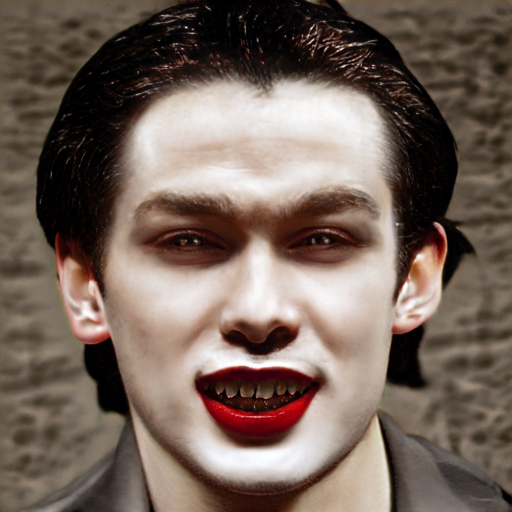

In [ ]:
#@title Generate Image
experiment_type = 'free_generation' #@param ['edit', 'free_generation']
description = 'Dracula muscular old male face pale white skin fangs slicked back hair' #@param {type:"string"}
latent_path = None #@param {type:"string"}
optimization_steps =  40#@param {type:"number"}
l2_lambda = 0.008 #@param {type:"number"}
id_lambda = 0.005 #@param {type:"number"}
stylespace = True #@param {type:"boolean"}
create_video = False
use_seed = False #@param {type:"boolean"}
seed =  0#@param {type: "number"}

args = {
    "description": description,
    "ckpt": "stylegan2-ffhq-config-f.pt",
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1,
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "id_lambda": id_lambda,
    'work_in_stylespace': stylespace,
    "latent_path": latent_path,
    "truncation": 0.7,
    "save_intermediate_image_every": 1 if create_video else 1,
    "results_dir": "results",
    "ir_se50_weights": "model_ir_se50.pth"
}

if use_seed:
  import torch
  torch.manual_seed(seed)
from optimization.run_optimization import main
from argparse import Namespace
result = main(Namespace(**args))

from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
result_image.save("/content/out.png")
h, w = result_image.size
result_image.resize((h, w))